In [14]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../../../..')
import mutagenesisfunctions as mf
import bpdev as bd

In [48]:
#filename = 'RF00005.stockholm.txt'
filename = 'RF00059_red_1.cyk.R2R.sto'
with open(filename, 'r') as fd:
    for line in fd:
        line = line.strip('\n')
        if '#=GC SS_cons' in line:
            print (line)
    fd.close()

#X_data = mf.sto_onehot(scary, alphabet='rna')

#=GC SS_cons .....<<<<<<<<<<<<<<<<<...>>>>>>.....<<<<<..>>>>>>>>>>>.....<<<<..<<<<<....>>>>>..>>>>..>>>>>............


In [33]:
scary = 'RF00005_WGS_STD_ALIGN'
arch_SS = ''
with open(scary, 'r') as fd:
    for line in fd:
        line = line.strip('\n')
        if '#=GC SS_cons' in line:
            line = line.split()
            print (line[2])
            arch_SS = arch_SS + line[2]
    fd.close()

((..(...(....(.....(....(........,............,...
...<.....<.....<...<......_..............._.......
........._.........._..............._.............
....._................._....................>...>.
...>....>...........,......<.....<....<.....<....<
............_.................._................._
................._.................._.............
....._................_.................>.....>...
.>...>...>...,,...................................
..................................................
.........................,...,..<...<....<.....<..
.<......_......._..._.........._..................
__...................._.......>....>......>.....>.
......>............)....)....).....)...)...).):


In [39]:
idx = [i for i,c in enumerate(arch_SS) if c != '.']
arch_redSS = ''.join([arch_SS[i] for i in idx])

In [45]:
arch_redSS

'(((((((,,<<<<_______>>>>,<<<<<_______>>>>>,,,,<<<<<_______>>>>>))))))):'

In [9]:
X_data.shape

(954, 118, 5)

In [29]:
seed_SS = "(((((((,.,.<<<<___...___..._>>>>,.<.<<<<_.__>>>>.>,,..,...,<<<.<<_.___.__.._>>>>.>.))))))).:"

In [11]:
red_len = len('GCCUGGCUGGCUUAGUGGUAGAGCAUGAGACUCUUGAUCUCGAGGUUGUGAGUUCCAGCCCCACACUGUGUG')
red_len

72

In [50]:
numhidden = 512
min_dist = 5.0
fam = 'RF00059'


#get scores
arrayspath = '../../marks/Arrays/%s_mlp_%s_red.npy'%(fam,numhidden)
hol_mut2 = np.load(arrayspath)
seqlen,_, dims,_ = hol_mut2.shape
C = bd.get_wc(arrayspath, seqlen, dims, bpugSQ=0, denoise='APC')

#get coordinates
C[np.tril_indices(seqlen)] = np.min(C)
bp_stretch = np.ravel(C)
minval = np.sort(bp_stretch)[::-1][-1] #just gets the minimum value - can be changed to a different idx
bs = np.where(C > minval)
idx = np.argsort(C[bs])
x = bs[0][idx] #sorts the x and y coords in order from lowest to highest so highest scores will be plotted last
y = bs[1][idx]

score_col = [C[xx,yy] for xx,yy in zip(x,y)] #gets the scores for each coordinate in the needed order



In [46]:
a = '(((((((,,<<<<_______>>>>,<<<<<_______>>>>>,,,,,<<<<<_______>>>>>))))))):'

In [51]:
t = '.....<<<<<<<<<<<<<<<<<...>>>>>>.....<<<<<..>>>>>>>>>>>.....<<<<..<<<<<....>>>>>..>>>>..>>>>>............'

/Users/steffanpaul/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


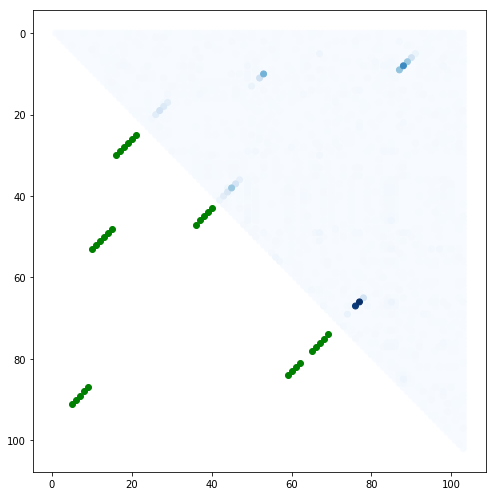

In [52]:
nest_coords = bd.bp_coords(t)
nest_coords = nest_coords[:len(nest_coords)//2]

plt.figure(figsize=(7,7))
plt.scatter(nest_coords[:, 0], nest_coords[:, 1], c='g', label = 'Nested')
plt.scatter(y, x, c=score_col, cmap='Blues', label = 'SoM', vmin=0.)
ax = plt.gca()
ax.invert_yaxis()
plt.show()


In [42]:
len(arch_redSS)

71

In [43]:
len(C)

72